In [2]:
import os

In [3]:
rock_dir = os.path.join('./mldownload/rps/rock')
paper_dir = os.path.join('./mldownload/rps/paper')
scissors_dir = os.path.join('./mldownload/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 830
['rock04-047.png', 'rock07-k03-036.png', 'rock04-070.png', 'rock07-k03-000.png', 'rock02-116.png', 'rock04-107.png', 'rock03-060.png', 'rock03-058.png', 'rock05ck01-069.png', 'rock03-004.png']
['paper02-048.png', 'paper06-055.png', 'paper07-116.png', 'paper06-119.png', 'paper05-043.png', 'paper06-017.png', 'paper05-046.png', 'paper04-006.png', 'paper02-037.png', 'paper01-083.png']
['scissors03-008.png', 'testscissors01-113.png', 'scissors02-117.png', 'scissors03-061.png', 'testscissors03-045.png', 'scissors03-058.png', 'scissors02-074.png', 'testscissors02-008.png', 'scissors01-011.png', 'scissors04-031.png']


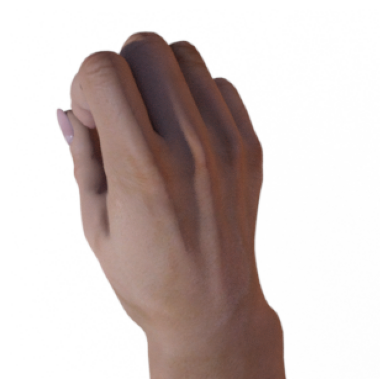

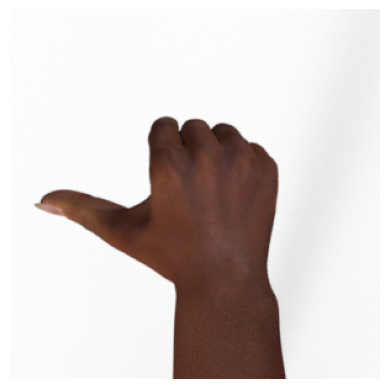

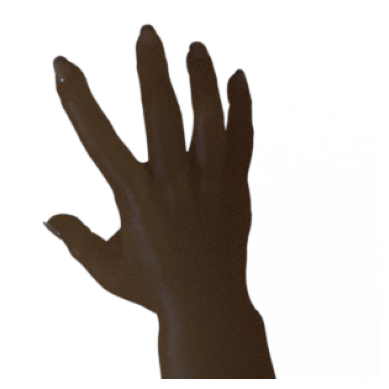

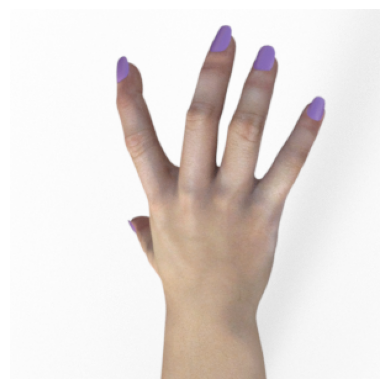

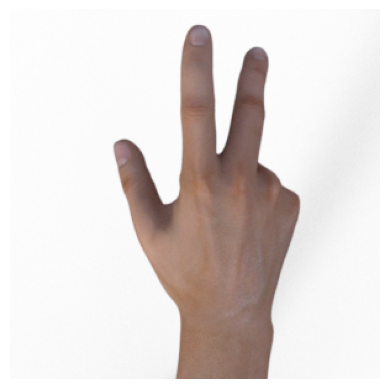

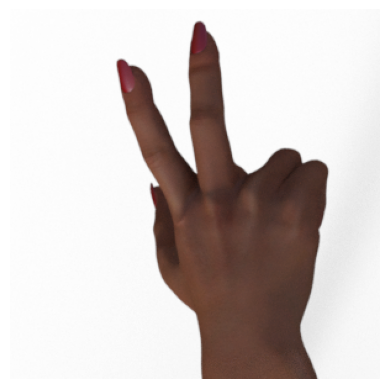

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()


In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./mldownload/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./mldownload/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


2023-06-03 06:10:01.200938: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-03 06:10:01.200973: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 2510 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


2023-06-03 06:10:11.475067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-03 06:10:11.475103: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-03 06:10:11.475132: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-4194aa): /proc/driver/nvidia/version does not exist
2023-06-03 06:10:11.475741: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2023-06-03 06:10:13.408899: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 34020000 exceeds 10% of free system memory.


Epoch 1/25


2023-06-03 06:10:16.380064: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 34020000 exceeds 10% of free system memory.
2023-06-03 06:10:16.402203: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 706535424 exceeds 10% of free system memory.
2023-06-03 06:10:17.225424: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 176633856 exceeds 10% of free system memory.
2023-06-03 06:10:17.318542: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 167215104 exceeds 10% of free system memory.


20/20 [==============================] - 84s 4s/step - loss: 1.3063 - accuracy: 0.3514 - val_loss: 1.0784 - val_accuracy: 0.6129
Epoch 2/25
20/20 [==============================] - 76s 4s/step - loss: 1.0765 - accuracy: 0.3964 - val_loss: 0.9047 - val_accuracy: 0.5511
Epoch 3/25
20/20 [==============================] - 76s 4s/step - loss: 1.0232 - accuracy: 0.4900 - val_loss: 0.8485 - val_accuracy: 0.6962
Epoch 4/25
20/20 [==============================] - 74s 4s/step - loss: 0.8350 - accuracy: 0.6171 - val_loss: 0.4141 - val_accuracy: 0.7930
Epoch 5/25
20/20 [==============================] - 74s 4s/step - loss: 0.6901 - accuracy: 0.7004 - val_loss: 0.5520 - val_accuracy: 0.6667
Epoch 6/25
20/20 [==============================] - 74s 4s/step - loss: 0.6634 - accuracy: 0.7247 - val_loss: 0.2259 - val_accuracy: 0.9704
Epoch 7/25
20/20 [==============================] - 73s 4s/step - loss: 0.4581 - accuracy: 0.8036 - val_loss: 0.1225 - val_accuracy: 0.9758
Epoch 8/25
20/20 [=============

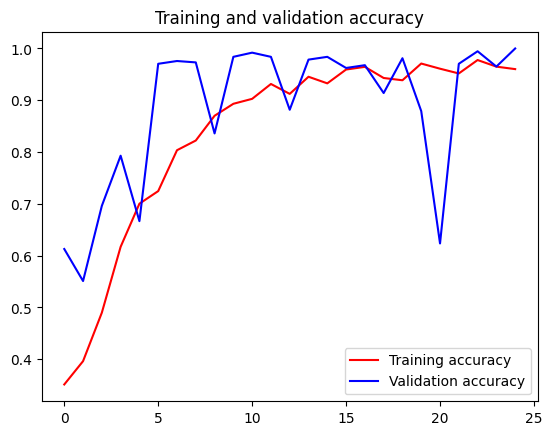

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
